In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("df_train_dicho.csv",index_col=0)

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,5,2,0,0,0,0,0,0,0,...,0,4,4,5,0,2,2008,0,0,208500
2,20,5,2,0,0,0,0,0,0,3,...,0,4,4,5,0,5,2007,0,0,181500
3,60,5,2,1,0,0,1,0,0,0,...,0,4,4,5,0,9,2008,0,0,223500
4,70,5,2,0,0,0,1,0,0,1,...,0,4,4,5,0,2,2006,0,1,140000
5,60,5,2,1,0,0,1,0,0,3,...,0,4,4,5,0,12,2008,0,0,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   MSZoning       1460 non-null   int64
 2   LotFrontage    1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   Alley          1460 non-null   int64
 6   LotShape       1460 non-null   int64
 7   LandContour    1460 non-null   int64
 8   Utilities      1460 non-null   int64
 9   LotConfig      1460 non-null   int64
 10  LandSlope      1460 non-null   int64
 11  Neighborhood   1460 non-null   int64
 12  Condition1     1460 non-null   int64
 13  Condition2     1460 non-null   int64
 14  BldgType       1460 non-null   int64
 15  HouseStyle     1460 non-null   int64
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [5]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [6]:
scaler=StandardScaler()
X= pd.DataFrame(scaler.fit_transform(df_train),index=df_train.index,columns=df_train.columns)

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,-0.701291,-0.306146,-0.02618,-0.538603,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-1.599111,0.138777,-0.358449,-0.394786,0.347273
2,-0.872563,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,-0.701291,-0.306146,-0.02618,3.341462,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-0.489110,-0.614439,-0.358449,-0.394786,0.007288
3,0.073375,-0.120682,0.501674,0.791710,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,-0.538603,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,0.990891,0.138777,-0.358449,-0.394786,0.536154
4,0.309859,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,0.754752,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-1.599111,-1.367655,-0.358449,0.283317,-0.515281
5,0.073375,-0.120682,0.501674,0.791710,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,3.341462,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,2.100892,0.138777,-0.358449,-0.394786,0.869843


In [8]:
X_c = X.drop(["SalePrice"],axis=1)
y=X["SalePrice"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_c,y,test_size=0.2)

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.score(X_train,y_train)

0.8447156893537546

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,y_train).mean()
#score très mauvais

-7.563799547408157e+22

In [14]:
lr.score(X_test,y_test)

0.8116798976326711

In [15]:
pred_train = lr.predict(X_train)

In [16]:
from scipy.stats import probplot

In [17]:
res= pred_train - y_train
res_norm = (res - res.mean())/(res.std())

In [18]:
probplot(res_norm)

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([-9.03574867, -6.90613211, -5.44149714, ...,  4.03631445,
          8.95964871,  9.83029823])),
 (0.9074467034781144, 2.20814953166378e-16, 0.9056340385026463))

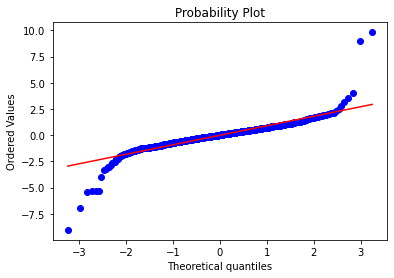

In [19]:

probplot(res_norm,plot=plt)

plt.show();

In [20]:
# bon je m'y attendais mais il y a beaucoup de problème de surapprentissage (énormément de variable sont corrélés entre elles)

In [21]:
#regression lineaire Ridge

In [22]:
ridge_reg = RidgeCV(alphas=(0.05,0.1,0.5,1.0,5.0,10.0))

In [23]:
ridge_reg.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.05,  0.1 ,  0.5 ,  1.  ,  5.  , 10.  ]))

In [24]:
ridge_reg.alpha_

10.0

In [25]:
ridge_reg.score(X_train,y_train)

0.8446365110112796

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
ridge_reg.score(X_test,y_test)

0.8163881930529078

In [28]:
y_pred_train= ridge_reg.predict(X_train)

In [29]:
y_pred_test=ridge_reg.predict(X_test)

In [30]:
mean_squared_error(y_test,y_pred_test)

0.14752770937143958

In [31]:
mean_squared_error(y_train,y_pred_train)

0.16286794769607565

In [32]:
# Bon c'est mieux

In [33]:
ridge_reg_2 = RidgeCV(alphas=(0.05,0.1,0.5,1.0,5.0,10.0,12.5,15.0,17.5,20.0),alpha_per_target=True)

In [34]:
ridge_reg_2.fit(X_train,y_train)

RidgeCV(alpha_per_target=True,
        alphas=array([ 0.05,  0.1 ,  0.5 ,  1.  ,  5.  , 10.  , 12.5 , 15.  , 17.5 ,
       20.  ]))

In [35]:
ridge_reg_2.alpha_

20.0

In [36]:
ridge_reg_2.score(X_train,y_train)

0.8444565363048387

In [37]:
ridge_reg_2.score(X_test,y_test)

0.81948568538056

In [38]:
y_pred_train_2= ridge_reg_2.predict(X_train)
y_pred_test_2=ridge_reg_2.predict(X_test)

In [39]:
mean_squared_error(y_test,y_pred_test_2)

0.14503894813384763

In [40]:
mean_squared_error(y_train,y_pred_train_2)

0.16305661564673773

In [41]:
#Regression linéaire Lasso

In [42]:
lasso = LassoCV(cv=10)

In [43]:
lasso.fit(X_train,y_train)

LassoCV(cv=10)

In [44]:
lasso.alpha_

0.01892765049034717

In [45]:
lasso.score(X_train,y_train)

0.8265589925601952

In [46]:
lasso.score(X_test,y_test)

0.8216301297335856

In [47]:
y_p_tr=lasso.predict(X_train)
y_p_te=lasso.predict(X_test)

In [48]:
mean_squared_error(y_train,y_p_tr)

0.18181865708558873

In [49]:
mean_squared_error(y_test,y_p_te)

0.14331593822214003

In [50]:
#Elastic Net

In [51]:
ml = ElasticNetCV()

In [52]:
ml.fit(X_train,y_train)

ElasticNetCV()

In [80]:
ml.l1_ratio_

0.5

In [77]:
ml.alphas_

array([1.63866561, 1.52822503, 1.42522778, 1.3291722 , 1.23959044,
       1.15604619, 1.07813255, 1.00547002, 0.93770471, 0.87450655,
       0.81556774, 0.7606012 , 0.70933923, 0.66153214, 0.61694708,
       0.57536692, 0.53658911, 0.5004248 , 0.46669784, 0.43524397,
       0.40590998, 0.37855301, 0.3530398 , 0.3292461 , 0.30705602,
       0.28636147, 0.26706166, 0.2490626 , 0.23227662, 0.21662195,
       0.20202236, 0.18840673, 0.17570874, 0.16386656, 0.1528225 ,
       0.14252278, 0.13291722, 0.12395904, 0.11560462, 0.10781326,
       0.100547  , 0.09377047, 0.08745066, 0.08155677, 0.07606012,
       0.07093392, 0.06615321, 0.06169471, 0.05753669, 0.05365891,
       0.05004248, 0.04666978, 0.0435244 , 0.040591  , 0.0378553 ,
       0.03530398, 0.03292461, 0.0307056 , 0.02863615, 0.02670617,
       0.02490626, 0.02322766, 0.0216622 , 0.02020224, 0.01884067,
       0.01757087, 0.01638666, 0.01528225, 0.01425228, 0.01329172,
       0.0123959 , 0.01156046, 0.01078133, 0.0100547 , 0.00937

In [81]:
ml.score(X_train,y_train)

0.8186058900776938

In [82]:
ml.score(X_test,y_test)

0.8203639550655171

In [83]:
y_p_tr_el=ml.predict(X_train)
y_p_te_el=ml.predict(X_test)

In [84]:
mean_squared_error(y_train,y_p_tr_el)

0.19015591500617776

In [85]:
mean_squared_error(y_test,y_p_te_el)

0.14433327938091492

In [ ]:
# pas d'amélioration

In [ ]:
# Elastic Net 2

In [88]:
ml2= ElasticNetCV(l1_ratio=(0.05,0.2,0.4,0.5,0.6,0.8,1),n_alphas=100,cv=10)

In [89]:
ml2.fit(X_train,y_train)

ElasticNetCV(cv=10, l1_ratio=(0.05, 0.2, 0.4, 0.5, 0.6, 0.8, 1))

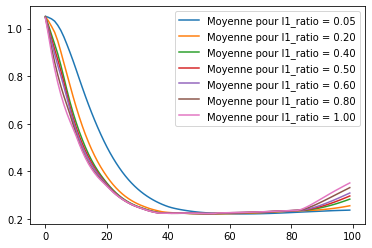

In [106]:
for i in range (ml2.mse_path_.shape[0]):
    plt.plot(ml2.mse_path_[i,:,:].mean(axis=1),label='Moyenne pour l1_ratio = %.2f'%ml2.l1_ratio[i])
plt.legend();

In [99]:
ml2.l1_ratio_

0.05

In [100]:
ml2.score(X_train,y_train)

0.8293473577399995

In [101]:
ml2.score(X_test,y_test)

0.8264081655843549

In [102]:
y_p_tr_el2=ml2.predict(X_train)
y_p_te_el2=ml2.predict(X_test)

In [103]:
mean_squared_error(y_train,y_p_tr_el2)

0.17889560664936371

In [104]:
mean_squared_error(y_test,y_p_te_el2)

0.13947690032975807

In [108]:
y_test.head()

Id
301   -0.301216
621   -1.434499
49    -0.855266
765    1.121683
706   -1.585604
Name: SalePrice, dtype: float64

In [113]:
df_out= pd.DataFrame(y_p_te_el2,columns=["SalePrice"],index=y_test.index)

In [114]:
df_out.head()

,SalePrice
Id,
301,-0.593087
621,-1.679587
49,-1.167331
765,0.735162
706,-1.848939
